<a href="https://colab.research.google.com/github/MusaibSyd/Deeplearning/blob/main/MNISTdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [17]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image=x_train[0]

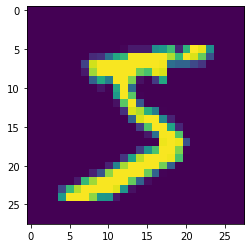

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example.shape

(60000, 10)

In [18]:
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,10)

In [19]:
x_train = x_train/255
x_test = x_test/255

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train = x_train.reshape(60000,28,28,1)
x_test =x_test.reshape(10000,28,28,1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [34]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.1406 - accuracy: 0.9575 - val_loss: 0.0560 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.0432 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0391 - val_accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0357 - val_accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0503 - val_accuracy: 0.9843


In [35]:
metrics=pd.DataFrame(model.history.history)

In [36]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140589,0.957550,0.056019,0.9819
1,0.048565,0.985550,0.043189,0.9846
2,0.030902,0.990383,0.039119,0.9867
3,0.021319,0.993383,0.035660,0.9877
4,0.014227,0.995683,0.050284,0.9843


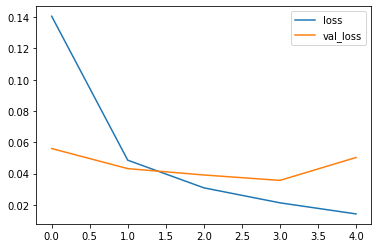

In [37]:
metrics[['loss', 'val_loss']].plot()

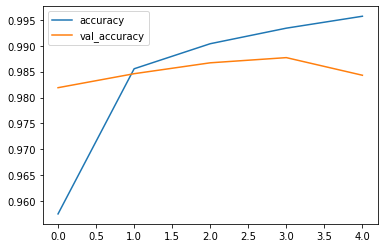

In [38]:
metrics[['accuracy', 'val_accuracy']].plot()

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



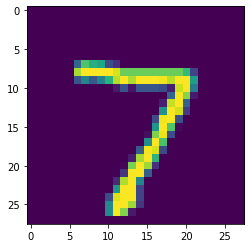

In [47]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))


In [49]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

1/1 [==============================] - 0s 35ms/step


array([7])